## KMEANS CLUSTERING 

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### K- FOLD CROSS VALIDATION

In [2]:
from sklearn.datasets import load_digits,load_iris

In [18]:
digits  = load_digits()

In [19]:
Xtrain, Xtest,ytrain,ytest = train_test_split(digits.data,digits.target,test_size = 0.3)

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain,ytrain)

C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
lr.score(Xtest,ytest)

0.9648148148148148

In [29]:
def get_score(model,Xtrain,Xtest,ytrain,ytest):
    model.fit(Xtrain,ytrain)
    return model.score(Xtest,ytest)

In [30]:
get_score(LogisticRegression(),Xtrain,Xtest,ytrain,ytest)

C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9230769230769231

In [23]:
from sklearn.model_selection import StratifiedKFold
SF = StratifiedKFold(n_splits=5)

In [32]:
lr = []
for i , j  in SF.split(digits.data,digits.target):
    Xtrain,Xtest,ytrain,ytest = digits.data[i], digits.data[j], digits.target[i],digits.target[j]
    lr.append(get_score(LogisticRegression(),Xtrain,Xtest,ytrain,ytest))
    

C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [33]:
lr

[0.9230769230769231,
 0.8812154696132597,
 0.9498607242339833,
 0.957983193277311,
 0.8929577464788733]

In [34]:
cross_val_score(LogisticRegression(),digits.data,digits.target)

C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning

array([0.89534884, 0.94991653, 0.90939597])

## K-MEANS ALGORITHM

## It is an unsupervised learning technique that allows us to separate the features into groups 

### Step1: Start with k-centroids putting them at random place with any value of k , e.g. k = 2
### Step2: Compute the distance of each data point from the centroid and cluster them accordingly 
### Step3: Adjust the centroids in such a way that they become the center of gravity for the given cluster
### Step4: Again re-cluster every point based on their distance from the centroid 
### Step5: Again adjust centroids
### Step6: Recompute clusters until a point where the data points stop changing the clusters

### Class Exercise

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


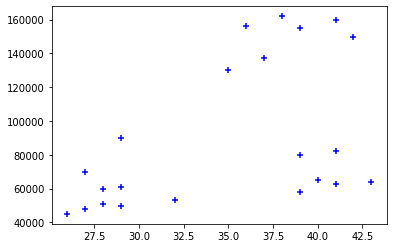

In [5]:
plt.scatter(df['Age'],df['Income($)'],color = 'blue', marker='+')

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
ypred = km.fit_predict(df[['Age','Income($)']])
ypred

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [8]:
df['Cluster'] = ypred.copy()

In [9]:
df

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [11]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


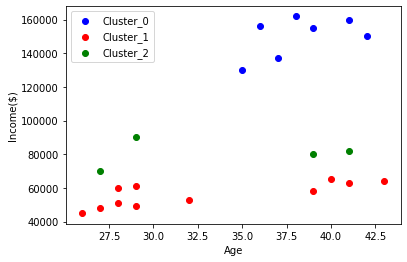

In [12]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='blue',label='Cluster_0')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='Cluster_1')
plt.scatter(df3.Age,df3['Income($)'],color='green',label='Cluster_2')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [13]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [14]:
kmob = KMeans(n_clusters=3)
kmob

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
ypred1 = kmob.fit_predict(df[['Age','Income($)']])
ypred1

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [16]:
df['Cluster2'] = ypred1.copy()

In [19]:
kmob.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [17]:
#df.drop(['Cluster'],axis=1, inplace=True)
#df
df.head()

,Name,Age,Income($),Cluster,Cluster2
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,1,1
3,Ismail,0.117647,0.128205,1,1
4,Kory,0.941176,0.897436,0,0


In [20]:
kmob.inertia_

0.4750783498553096

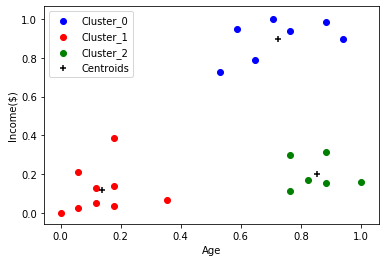

In [18]:
df1 = df[df.Cluster2==0]
df2 = df[df.Cluster2==1]
df3 = df[df.Cluster2==2]

plt.scatter(df1.Age,df1['Income($)'],color='blue',label='Cluster_0')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='Cluster_1')
plt.scatter(df3.Age,df3['Income($)'],color='green',label='Cluster_2')
plt.scatter(kmob.cluster_centers_[:,0],kmob.cluster_centers_[:,1], color = 'black', marker='+',label='Centroids')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

### Elbow Method to Identify the Optimum  number of clusters

In [19]:
K = range(1,10)
sse = []
for k in K:
    kmo = KMeans(n_clusters=k)
    kmo.fit(df[['Age','Income($)']])
    sse.append(kmo.inertia_)

In [20]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2621792762345213,
 0.21878010893330446,
 0.16858512236029757,
 0.13706529523670866,
 0.10188787724979426]

Text(0, 0.5, 'SSE')

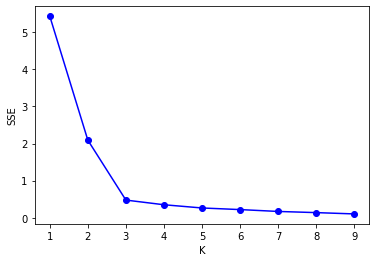

In [23]:
plt.plot(K,sse,'bo-')
plt.xlabel('K')
plt.ylabel('SSE')

In [21]:
from sklearn.datasets import load_iris

In [22]:
iris = load_iris()

In [23]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [24]:
petal = pd.DataFrame(iris.data,columns=iris.feature_names)
petal

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
petal.drop(['sepal length (cm)','sepal width (cm)'],axis=1,inplace=True)
petal

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [95]:
scale = MinMaxScaler()
scale.fit(petal[['petal length (cm)']])
petal['petal length (cm)'] = scale.transform(petal[['petal length (cm)']])
petal.head()

scale.fit(petal[['petal width (cm)']])
petal['petal width (cm)'] = scale.transform(petal[['petal width (cm)']])
petal.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


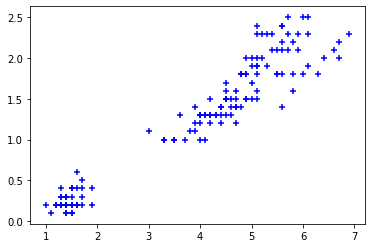

In [26]:
plt.scatter(petal['petal length (cm)'],petal['petal width (cm)'],color='blue',marker='+')

In [28]:
kmoo = KMeans(n_clusters=3)
kmoo

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
petal

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [30]:
fpred = kmoo.fit_predict(petal)
fpred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
petal['cluster'] = fpred.copy()

In [33]:
petal.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


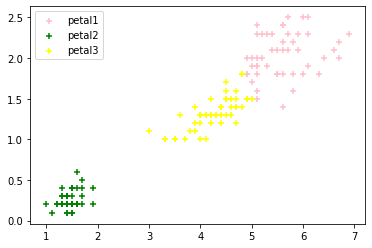

In [34]:
petal1 = petal[petal.cluster==0]
petal2 = petal[petal.cluster==1]
petal3 = petal[petal.cluster==2]

plt.scatter(petal1['petal length (cm)'],petal1['petal width (cm)'],color='pink',marker='+',label='petal1')
plt.scatter(petal2['petal length (cm)'],petal2['petal width (cm)'],color='green',marker='+',label='petal2')
plt.scatter(petal3['petal length (cm)'],petal3['petal width (cm)'],color='yellow',marker='+',label='petal3')

plt.legend()

In [35]:
kmoo.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

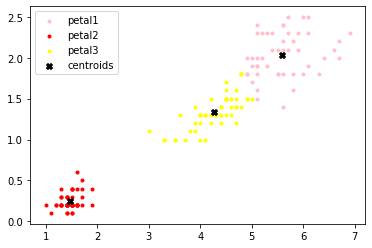

In [35]:
petal1 = petal[petal.cluster==0]
petal2 = petal[petal.cluster==1]
petal3 = petal[petal.cluster==2]

plt.scatter(petal1['petal length (cm)'],petal1['petal width (cm)'],color='pink',label='petal1',marker='.')
plt.scatter(petal2['petal length (cm)'],petal2['petal width (cm)'],color='red',label='petal2',marker='.')
plt.scatter(petal3['petal length (cm)'],petal3['petal width (cm)'],color='yellow',label='petal3',marker='.')
plt.scatter(kmoo.cluster_centers_[:,0],kmoo.cluster_centers_[:,1],color='black',marker='X',label='centroids')


plt.legend()

In [36]:
kmoo.inertia_

31.371358974358973

In [37]:
ssee = []
KM = range(1,10)
for k in KM:
    kmc = KMeans(n_clusters=k)
    kmc.fit(petal[['petal length (cm)','petal width (cm)']])
    ssee.append(kmc.inertia_)

In [38]:
ssee

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.48300089968511,
 13.916908757908757,
 11.057257664362929,
 9.19386673204751,
 7.694466203872855,
 6.671168597742126]

Text(0, 0.5, 'SSE')

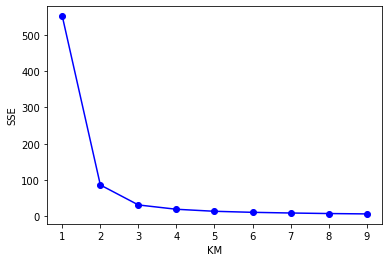

In [39]:
plt.plot(KM,ssee,'bo-')
plt.xlabel('KM')
plt.ylabel('SSE')

Text(0, 0.5, 'SSE')

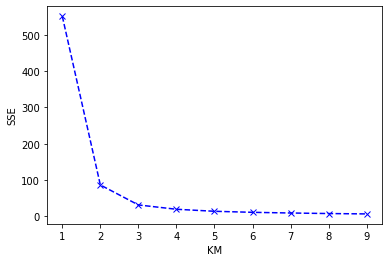

In [40]:
plt.plot(KM,ssee,'bx--')
plt.xlabel('KM')
plt.ylabel('SSE')

In [41]:
from sklearn.datasets import load_digits

digits = load_digits()

In [42]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [43]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [44]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [45]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<Figure size 432x288 with 0 Axes>

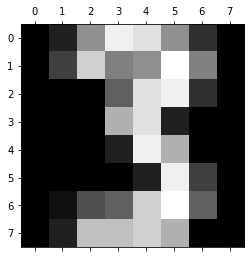

In [48]:
plt.gray()
plt.matshow(digits.images[13])

In [49]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])